# Q1

In [11]:
import random
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import math
from math import *

np.random.seed(123)

def chol2by2(var1 = 3, var2 = 5, cov = 0, rho = 0):
    sigma1 = sqrt(var1)
    sigma2 = sqrt(var2)
    #cov = sigma1*sigma2*rho
    if(cov != 0):
        rho = cov / (sigma1 * sigma2)
        L = [[sigma1, 0], [sigma2*rho, sigma2*sqrt(1 - rho*rho)]]
        return L
    else: 
        L = [[sigma1, 0], [sigma2*rho, sigma2*sqrt(1 - rho*rho)]]
        return L

In [12]:
##### 1. Multivariate-Normal (Xi, Yi)
mu = np.array([0, 0])
varcov = np.array([[1, -0.7], [-0.7, 1]])
L = np.array(chol2by2(cov=-0.7))
n = 1000
z1 = np.random.normal(0, 1, n)
z2 = np.random.normal(0, 1, n)

X = [ mu[0] + L[0][0]*x for x in z1 ]
Y = [ mu[0] + L[1][0]*x + L[1][1]*y for x, y in zip(z1, z2) ]

x_bar = np.mean(X)
y_bar = np.mean(Y)
cov_xy = sum([ (x - x_bar)*(y - y_bar) for x, y in zip(X, Y) ]) / (n-1)
s_x = sqrt(sum([ (x - x_bar)*(x - x_bar) for x in X ]) / (n-1))
s_y = sqrt(sum([ (y - y_bar)*(y - y_bar) for y in Y ]) / (n-1))
s_rho = cov_xy / (s_x * s_y)
print('Q1: rho =', s_rho)


Q1: rho = -0.21799233252552094


# Q2

In [13]:
L = np.array(chol2by2(var1=1,var2=1,rho=0.6))
n = 1000
z1 = np.random.normal(0, 1, n)
z2 = np.random.normal(0, 1, n)
X2 = [ mu[0] + L[0][0]*x for x in z1 ]
Y2= [ mu[0] + L[1][0]*x + L[1][1]*y for x, y in zip(z1, z2) ]
q2 = [max(0,x**3+sin(y)+(x**2)*y) for x,y in zip(X2, Y2)]
output = np.mean(q2)
print("Q2: E=", output)

Q2: E= 1.4872778508425535


# Q3

In [14]:
L = np.array(chol2by2(rho=0.6))
n = 1000
z1 = np.random.normal(0, 1, n)
X3 = z1
def W3(X,t):
    return np.sqrt(t)*X
A31 = [W3(x,1)**2 + sin(W3(x,1)) for x in X3 ]
print("mean A31: ",np.mean(A31))
A33 = [W3(x,3)**2 + sin(W3(x,3)) for x in X3 ]
print("mean A33: ",np.mean(A33))
A35 = [W3(x,5)**2 + sin(W3(x,5)) for x in X3 ]
print("mean A35: ",np.mean(A35))

B31 = [np.exp(1/2)*cos(W3(x,1)) for x in X3 ]
print("mean B31: ",np.mean(B31))
B33 = [np.exp(3/2)*cos(W3(x,3)) for x in X3 ]
print("mean B33: ",np.mean(B33))
B35 = [np.exp(5/2)*cos(W3(x,5))for x in X3 ]
print("mean B35: ",np.mean(B35))



mean A31:  1.0554257515933692
mean A33:  3.0802576998426376
mean A35:  5.10560377409136
mean B31:  0.9806353911037967
mean B33:  0.8297112373450689
mean B35:  0.36334179232172836


In [15]:
np.cov(B31,B33,B35)

array([[0.51866058, 1.86574802],
       [1.86574802, 8.77756934]])

In [16]:
z5 = np.random.normal(0, 1, n)
t = sqrt(1)
W_5 = [ t*x for x in z5 ]
q3_5 = [ x*x + sin(x) for x in W_5 ]
q3_5_mean = np.mean(q3_5)
print("3a: \n E(At) for t=1: ", q3_5_mean)

t = sqrt(3)
W_5 = [ t*x for x in z5 ]
q3_5 = [ x*x + sin(x) for x in W_5 ]
q3_5_mean = np.mean(q3_5) 
print("3a: \n E(At) for t=3: ", q3_5_mean)

t = sqrt(5)
W_5 = [ t*x for x in z5 ]
q3_5 = [ x*x + sin(x) for x in W_5 ]
q3_5_mean = np.mean(q3_5) 
print("3a: \n E(At) for t=5: ", q3_5_mean)


t1 = 1
t1root = sqrt(t1)
exp_t1 = exp(t1 / 2)
z6 = np.random.normal(0, 1, n)
W_1 = [t1root * x for x in z6] 
q3_1 = [exp_t1 * cos(x) for x in W_1]
q3_1_mean = np.mean(q3_1) 

print("3a: \n E(Bt) for t=1: ", q3_1_mean)

t2 = 3 
t2root = sqrt(t2) 
exp_t2 = exp(t2 / 2)
z7 = np.random.normal(0, 1, n)
W_32 = [t2root * y for y in z7]
q3_32 = [exp_t2 * cos(y) for y in W_32]
q3_32_mean = np.mean(q3_32); 
print("3a: \n E(Bt) for t=3: ", q3_32_mean)

t2 = 5
t2root = sqrt(t2) 
exp_t2 = exp(t2 / 2)
z7 = np.random.normal(0, 1, n)
W_32 = [t2root * y for y in z7]
q3_32 = [exp_t2 * cos(y) for y in W_32]
q3_32_mean = np.mean(q3_32)
q3_32_var=np.var(q3_32)
print("3a: \n E(Bt) for t=5: ", q3_32_mean)

3a: 
 E(At) for t=1:  0.9417177523413406
3a: 
 E(At) for t=3:  2.846939553287372
3a: 
 E(At) for t=5:  4.7567722729832225
3a: 
 E(Bt) for t=1:  1.0049214021137916
3a: 
 E(Bt) for t=3:  0.9843607403745186
3a: 
 E(Bt) for t=5:  0.7222818732616011


In [19]:

def at(t):
    w_t = np.sqrt(t)*np.random.normal(0, 1, 10000)
    temp = []
    for i in range(10000):
        temp.append(w_t[i]**2+math.sin(w_t[i]))
    e = np.mean(temp)
    var = np.var(temp)
    return [e,var]
def bt(t):
    w_t = np.sqrt(t)*np.random.normal(0, 1, 10000)
    temp = []
    for i in range(10000):
        temp.append(math.exp(t/2)*math.cos(w_t[i]))
    e = np.mean(temp)
    var = np.var(temp)
    return [e,var]
at(5)[1],bt(5)[1]

(48.09049246945662, 73.91978193795349)

In [21]:
def at_av(t):
    w_t = np.sqrt(t)*np.random.normal(0, 1, 10000)
    w_t_minus = [-i for i in w_t]
    temp = []
    for i in range(10000):
        average = (w_t[i]**2+math.sin(w_t[i])+w_t_minus[i]**2+math.sin(w_t_minus[i]))/2
        temp.append(average)
    e = np.mean(temp)
    var = np.var(temp)
    return [e,var]
def bt_av(t):
    w_t = np.sqrt(t)*np.random.normal(0, 1, 10000)
    w_t_minus = [-i for i in w_t]
    temp = []
    for i in range(10000):
        average = (math.exp(t/2)*math.cos(w_t[i])+math.exp(t/2)*math.cos(w_t_minus[i]))/2
        temp.append(average)
    e = np.mean(temp)
    var = np.var(temp)
    return [e,var]
at_av(5)[1],bt_av(5)[1]

(50.643663115873316, 72.7570175611027)

In [24]:
r = 0.04; sigma = 0.2; S0 = 88; T = 5; t = sqrt(T); X = 100

S_Ts = list()
for i in range(0, 1000, 1):
    z = np.random.normal(0, 1, 1000)
    Wt = [ t*x for x in z ]
    S_T = S0 * exp(sigma*Wt[len(Wt)-1] + (r-sigma*sigma/2)*T)
    S_Ts.append(S_T)

discount = exp(-1*r*T)
C_0s = [ discount*(max(0, (S_T - X))) for S_T in S_Ts ]

In [26]:
S_plus = list()
S_minus = list()
for i in range(1, 1001, 1):
    z = np.random.normal(0, 1, 1000)
    Wt_z = [ t*x for x in z ]
    S_z = S0 * exp(sigma*Wt_z[len(Wt_z)-1] + (r-sigma*sigma/2)*T)
    S_plus.append(S_z)
    Wt_anti_z = [ t*(-1)*x for x in z ]
    S_anti_z = S0 * exp(sigma*Wt_anti_z[len(Wt_anti_z)-1] + (r-sigma*sigma/2)*T)
    S_minus.append(S_anti_z)

C_plus = [ discount*(max(0, (splus - X))) for splus in S_plus ]
C_minus = [ discount*(max(0, (sminus - X))) for sminus in S_minus ]
c = [(x + y)/2 for x, y in zip(C_plus, C_minus)]

matrix3 = np.reshape((np.mean(C_0s), np.var(C_0s), np.mean(c), np.var(c)), (2, 2))
df3 = pd.DataFrame(matrix3, columns = ['Mean', 'Variance'], index=['Monte Carlo 4.(a)', 'Antithetic 4.(b)'])
df3

,Mean,Variance
Monte Carlo 4.(a),17.121453,798.185721
Antithetic 4.(b),18.539595,358.901965


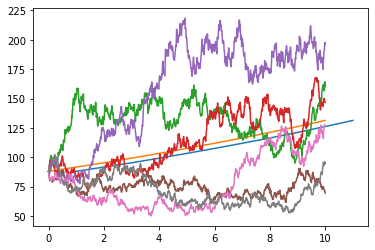

In [30]:
r = 0.04; sigma = 0.18; S0 = 88
S = []
S.append(S0)
st = []
for i in range(1, 11, 1):
    for j in range(0, 1000, 1):
        z = np.random.normal(0, 1, 1000)
        w = [ sqrt(i)*x for x in z ]
        st.append(np.mean( [ S0 * exp( sigma*x + (r-sigma*sigma/2)*i ) for x in w] ))
    S.append(np.mean(st))
    st.clear()

k = [i for i in range(1, 12, 1)]
k
plt.plot(k,S)
 
w0 = 0; dt = 10/1000
S1 = []
paths = pd.DataFrame()
for i in range(1, 7, 1):
    S1.clear()
    S1.append(S0)
    for j in np.arange(dt, 10.01, dt):
        z = np.random.normal(0, 1, 1)
        w = sqrt(dt)*z 
        S1.append( S1[-1] * exp(sigma*w + (r-sigma*sigma/2)*dt) )
    column = 'path' + str(i)
    paths[column] = S1
    
plt.plot(range(0, 11, 1), S)
plt.plot(np.arange(0, 10.01, dt), paths)
plt.show()

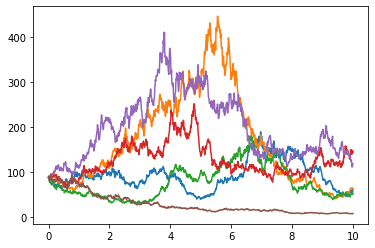

In [29]:
sigma = 0.35; dt = 10/1000
S1 = []
paths = pd.DataFrame()
for i in range(1, 7, 1):
    S1.clear()
    S1.append(S0)
    #W = np.zeros(1000)
    for j in np.arange(dt, 10.01, dt):
        z = np.random.normal(0, 1, 1)
        w = sqrt(dt)*z 
        S1.append( S1[-1] * exp(sigma*w + (r-sigma*sigma/2)*dt) )
    column = 'path' + str(i)
    paths[column] = S1

plt.plot(np.arange(0, 10.01, dt), paths)
plt.show()

In [31]:
dt = 1/1000
integral = 4 * sum([(sqrt(1 - x*x)) * dt for x in np.arange(dt, 1+dt, dt)])
print('\n6. (a): Ia =', integral)

uni = np.random.uniform(0, 1, 1000)
monte = [4 * sqrt(1 - x*x) for x in uni]
print('\n6. (b): Ib =', np.mean(monte))


6. (a): Ia = 3.1395554669110277

6. (b): Ib = 3.16051128763782


In [47]:
gx = 1/(1-(0.74/3))

t = lambda x: (1-0.74*x**2)/(1-0.74/3) if 0 <= x <= 1 else 0

def ar(n):
    int_ =[]
    while n >0:
        u1 = np.random.uniform(0,1)
        u2 = np.random.uniform(0,1)
        if u1<= t(u2)/gx:
            int_.append(u2)
            n -= 1
        else:
            pass
        return int_
    
int_ = ar(10000)
int_ = sum (map(lambda x:4*sqrt(1-x**2)/t(x),int_))/len(int_)
int_

3.022652981832221